In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR='/content/drive/MyDrive/Data1(no black patches)'
CATEGORIES=["Alumininum","Copper","Iron","Manganese"]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


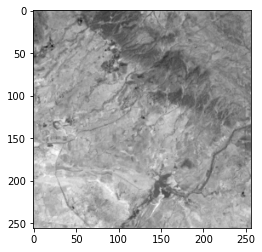

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[62 62 63 ... 71 71 73]
 [63 64 62 ... 71 70 71]
 [62 64 66 ... 70 73 70]
 ...
 [91 89 84 ... 77 75 75]
 [87 84 83 ... 76 77 73]
 [81 81 83 ... 78 77 73]]


In [5]:
print(img_array.shape)

(256, 256)


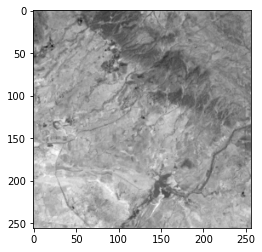

In [6]:
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

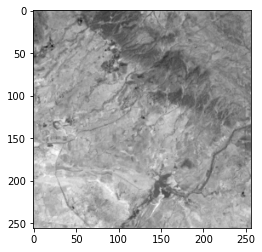

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 710/710 [00:09<00:00, 74.18it/s] 

6392


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
3
1
0
1
1
1
1
1
1


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(X.shape)

[[[[79]
   [75]
   [75]
   ...
   [71]
   [70]
   [64]]

  [[82]
   [77]
   [73]
   ...
   [74]
   [71]
   [72]]

  [[82]
   [75]
   [71]
   ...
   [73]
   [73]
   [74]]

  ...

  [[70]
   [66]
   [69]
   ...
   [72]
   [82]
   [80]]

  [[75]
   [76]
   [77]
   ...
   [79]
   [76]
   [74]]

  [[76]
   [76]
   [74]
   ...
   [75]
   [70]
   [68]]]]
(6392, 256, 256, 1)


In [14]:
y

[1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 3,
 3,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
y

[1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 3,
 3,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
